# Plotting Figure 1
> Domain of linearity of discrete shape derivative for Rijke tube

Slope: -98.9735938639569
Slope: 1.6224164065448496


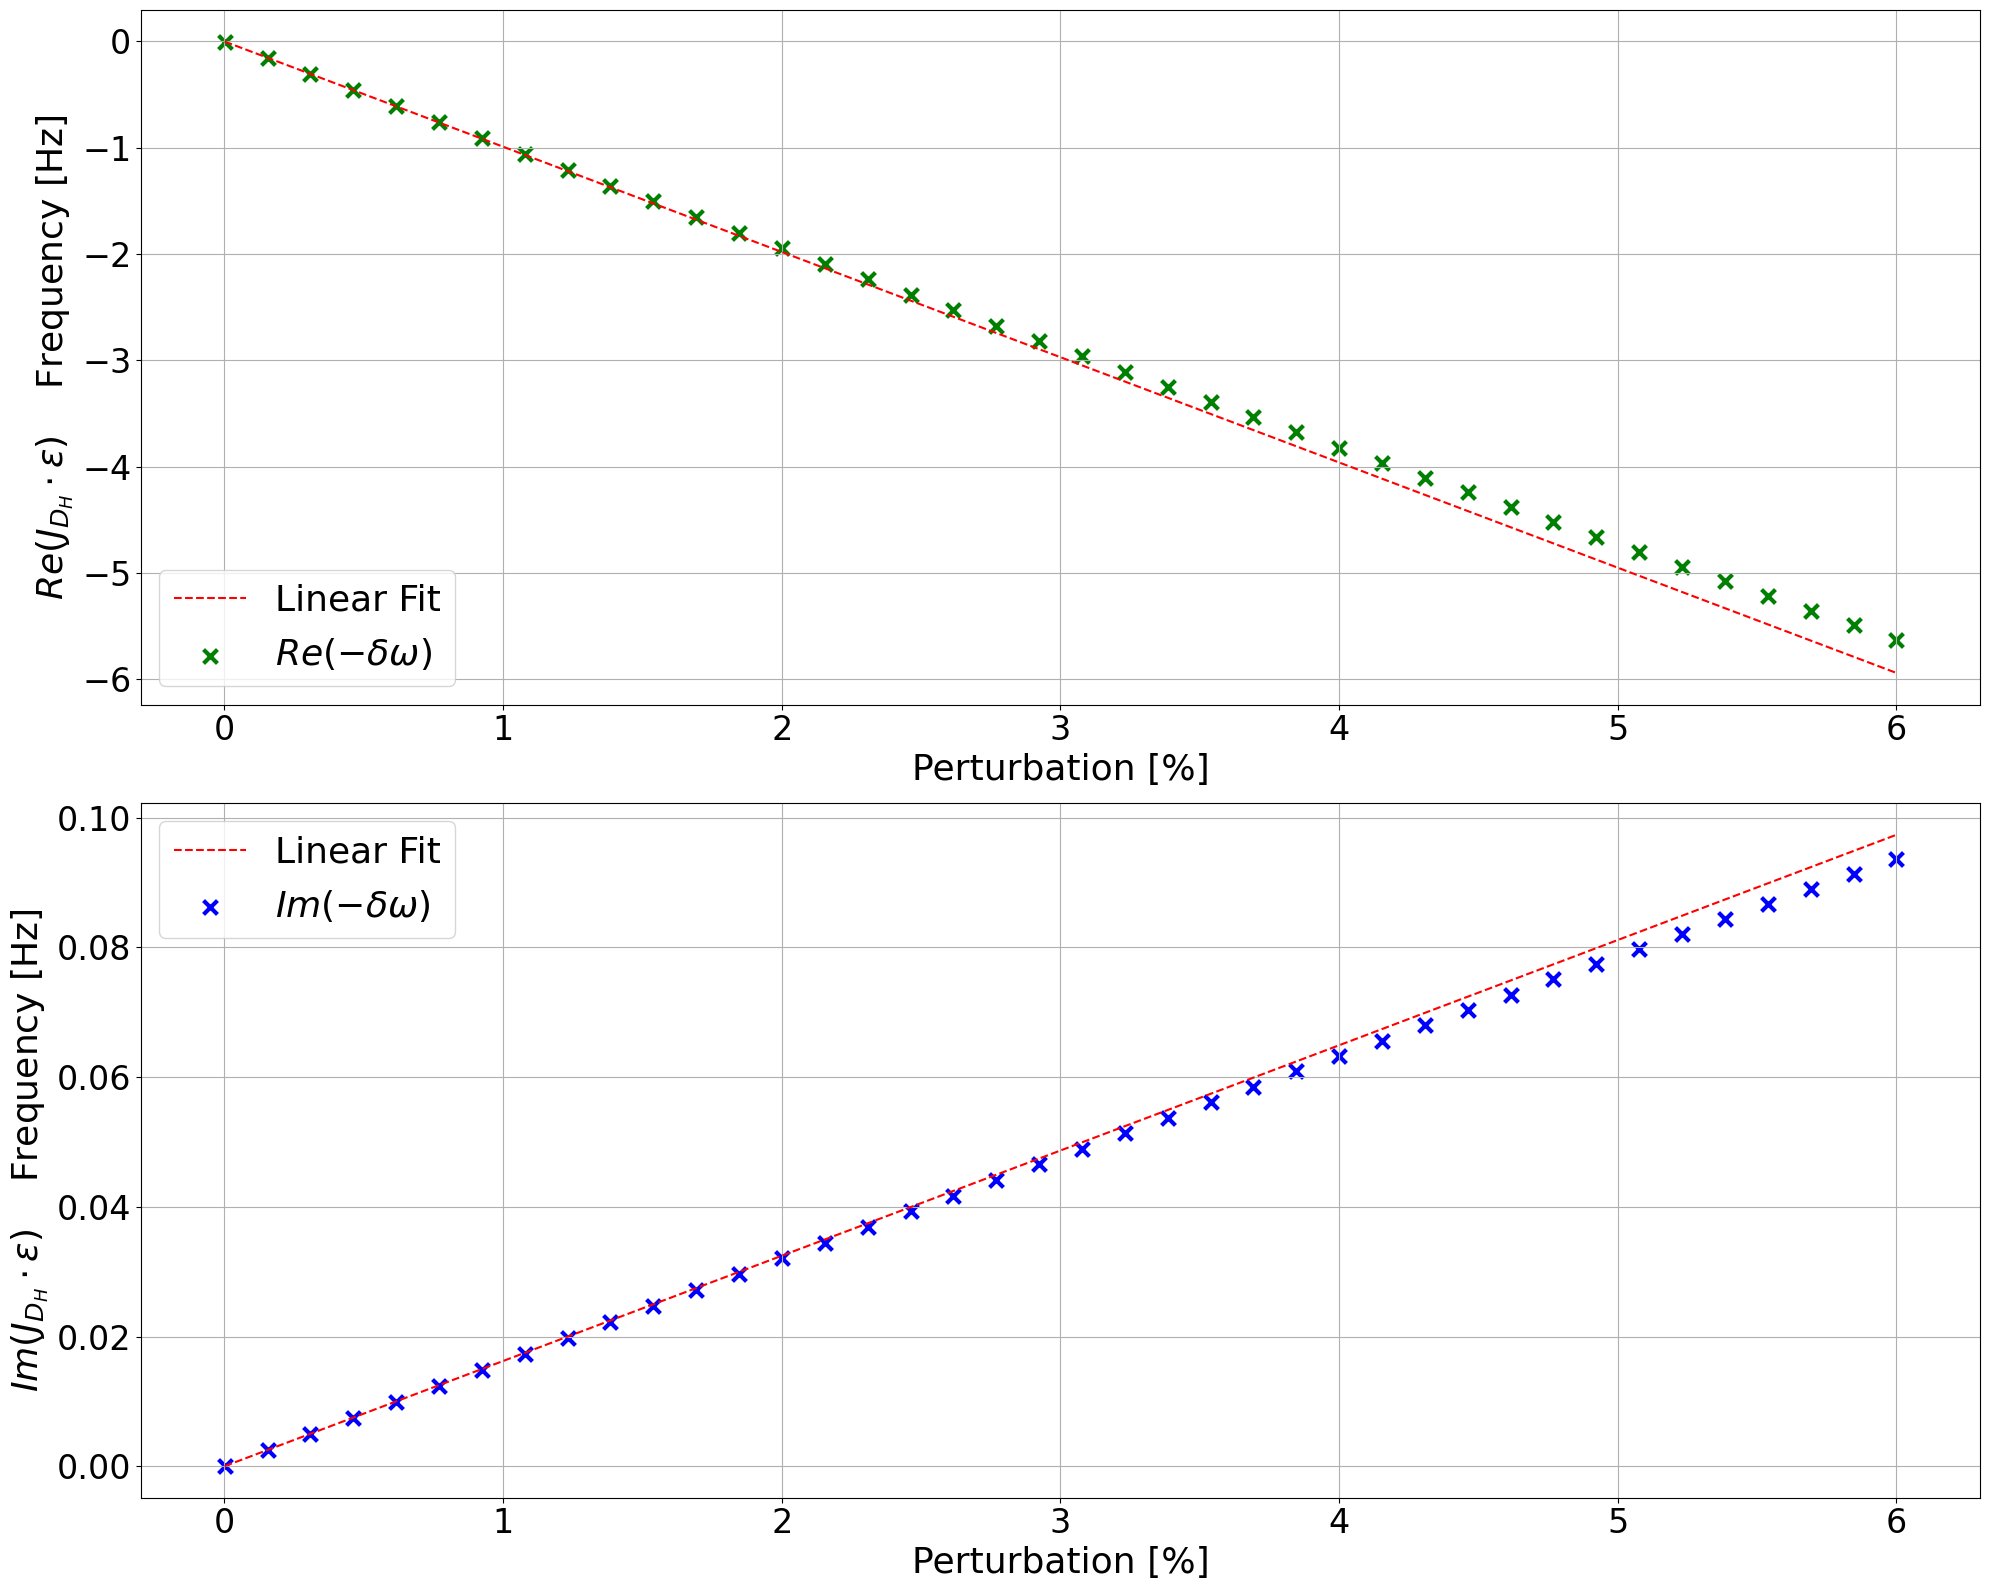

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

fontsize = 26
os.chdir(os.path.join(os.getcwd()))
file = os.path.join('data_fig1.txt')

with open(file, 'r') as f:
    lines = f.readlines()
perturbations = []
real_discrete_shape_derivatives = []
imag_discrete_shape_derivatives = []

# Read the data from the file
for line in lines[1:]: # skip the first line
    p, real, imag = map(float, line.strip().split(','))
    perturbations.append(p)
    real_discrete_shape_derivatives.append(real)
    imag_discrete_shape_derivatives.append(imag)
# transform the lists into numpy arrays to perform operations
perturbations = np.array(perturbations)

# create figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 16))

# Fit a linear line to the first few data points
# real part
real_slope, real_intercept = np.polyfit(perturbations[:2], real_discrete_shape_derivatives[:2], 1)
real_linear_fit = real_slope * perturbations + real_intercept
print('Slope:', real_slope)
ax1.plot(perturbations*100, real_linear_fit, 'r--', label='Linear Fit')
# imaginary part
imag_slope, imag_intercept = np.polyfit(perturbations[:2], imag_discrete_shape_derivatives[:2], 1)
imag_linear_fit = imag_slope * perturbations + imag_intercept
print('Slope:', imag_slope)
ax2.plot(perturbations*100, imag_linear_fit, 'r--', label='Linear Fit')

# Plot the real part of shape derivatives
ax1.scatter(perturbations*100, real_discrete_shape_derivatives, color='green', marker='x',s=100,linewidth=3, label=r'$Re(-\delta \omega)$')
# Set labels and title
ax1.set_xlabel('Perturbation [%]', fontsize=fontsize)
ax1.set_ylabel(r'$Re(J_{D_H}\cdot \epsilon)$    Frequency [Hz]', fontsize=fontsize)
ax1.legend(loc='lower left', fontsize=fontsize)
ax1.grid(True)

# plot the imaginary part of shape derivatives
ax2.scatter(perturbations*100, imag_discrete_shape_derivatives, marker='x',linewidth=3,s=100, label=r'$Im(-\delta \omega)$', color='blue')
# Set labels and title
ax2.set_xlabel('Perturbation [%]', fontsize=fontsize)
ax2.set_ylabel(r'$Im(J_{D_H}\cdot \epsilon)$    Frequency [Hz]', fontsize=fontsize)
ax2.legend(loc='upper right')
ax2.legend(fontsize=fontsize)
ax2.grid(True)

# Increase the font size of the axis numbers
ax1.tick_params(axis='both', which='major', labelsize=24)
ax2.tick_params(axis='both', which='major', labelsize=24)

plt.tight_layout() # make plot look better
plt.show() # show the plot

# Save the figure to the 'Images/' folder
fig.savefig(os.path.join('Images/', 'Fig1.png'))